In [48]:
import pandas as pd
import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(columns=['month', 'day', 'hour', 'min', 'lat', 'lon'])

# Import data
def readadddata(filename, df):
    data = pd.read_csv(filename)
    datetimes = data['Date/Time']
    lats = data['Lat']
    lons = data['Lon']
    month = []
    day = []
    hour = []
    minute = []
    lat = []
    lon = []
    
    for datetime in datetimes:
        month.append(int(datetime.split('/')[0]))
        day.append(int(datetime.split('/')[1]))
        hour.append(int(datetime.split()[1].split(':')[0]))
        minute.append(int(datetime.split()[1].split(':')[1]))
    for l in lats:
        lat.append(float(l))
    for l in lons:
        lon.append(float(l))
    
    temp = pd.DataFrame()
    temp['month'] = month
    temp['day'] = day
    temp['hour'] = hour
    temp['min'] = minute
    temp['lat'] = lat
    temp['lon'] = lon
    return pd.concat([df, temp])

df = readadddata('uberdata/uber-raw-data-apr14.csv', df)
df = readadddata('uberdata/uber-raw-data-may14.csv', df)
df = readadddata('uberdata/uber-raw-data-jun14.csv', df)
df = readadddata('uberdata/uber-raw-data-jul14.csv', df)
df = readadddata('uberdata/uber-raw-data-aug14.csv', df)
df = readadddata('uberdata/uber-raw-data-sep14.csv', df)
print(df.head())

   month  day  hour   min      lat      lon
0    4.0  1.0   0.0  11.0  40.7690 -73.9549
1    4.0  1.0   0.0  17.0  40.7267 -74.0345
2    4.0  1.0   0.0  21.0  40.7316 -73.9873
3    4.0  1.0   0.0  28.0  40.7588 -73.9776
4    4.0  1.0   0.0  33.0  40.7594 -73.9722


In [61]:
# df_citi = pd.DataFrame(columns=['month', 'day', 'hour', 'min', 'lat', 'lon'])

# Import data
def readadddata_citi(filename, df):
    data = pd.read_csv(filename)
    datetimes = data['starttime']
    lats = data['start station latitude']
    lons = data['start station longitude']
    month = []
    day = []
    hour = []
    minute = []
    lat = []
    lon = []
    
    for datetime in datetimes:
        month.append(int(datetime.split('/')[0]))
        day.append(int(datetime.split('/')[1].split()[0]))
        hour.append(int(datetime.split()[1].split(':')[0]))
        minute.append(int(datetime.split()[1].split(':')[1]))
    for l in lats:
        lat.append(float(l))
    for l in lons:
        lon.append(float(l))
    
    temp = pd.DataFrame()
    temp['month'] = month
    temp['day'] = day
    temp['hour'] = hour
    temp['min'] = minute
    temp['lat'] = lat
    temp['lon'] = lon
    return pd.concat([df, temp])

df_citi = readadddata_citi('citidata/2014-04.csv', df_citi)
df_citi = readadddata_citi('citidata/2014-05.csv', df_citi)
df_citi = readadddata_citi('citidata/2014-06.csv', df_citi)
df_citi = readadddata_citi('citidata/2014-07.csv', df_citi)
df_citi = readadddata_citi('citidata/2014-08.csv', df_citi)
df_citi = readadddata_citi('citidata/2014-09.csv', df_citi)
print(df_citi.head())

   month  day  hour  min        lat        lon
0    4.0  1.0   0.0  0.0  40.711174 -74.000165
1    4.0  1.0   0.0  0.0  40.718502 -73.983299
2    4.0  1.0   0.0  0.0  40.730287 -73.990765
3    4.0  1.0   0.0  0.0  40.715348 -73.960241
4    4.0  1.0   0.0  1.0  40.746745 -74.007756


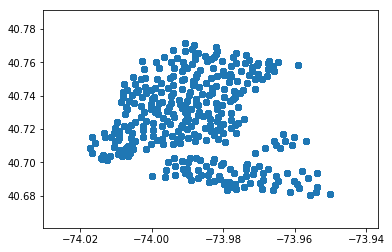

In [169]:
import matplotlib.pyplot as plt
plt.scatter(df_citi['lon'], df_citi['lat'])
plt.show()

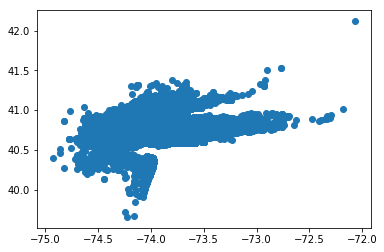

In [170]:
plt.scatter(df['lon'], df['lat'])
plt.show()

In [116]:
print(np.amax(df_citi['lon']))
print(np.amin(df_citi['lon']))
np.amax(df_citi['lon']) - np.amin(df_citi['lon'])

-73.9500479759
-74.01713445


0.067086474099994575

In [110]:
print(np.amax(df_citi['lat']))
print(np.amin(df_citi['lat']))
np.amax(df_citi['lat']) - np.amin(df_citi['lat'])

40.771522
40.680342423


0.091179576999998346

In [147]:
lats = df['lat']
lons = df['lon']

lats_cleaned = lats[lats.between(lats.quantile(0.067), lats.quantile(0.867))]
print(np.amax(lats_cleaned))
print(np.amin(lats_cleaned))
print(np.amax(lats_cleaned) - np.amin(lats_cleaned))

40.7715
40.6804
0.0911


In [135]:
lons_cleaned = lons[lons.between(lons.quantile(0.023), lons.quantile(0.86))]
print(np.amax(lons_cleaned))
print(np.amin(lons_cleaned))
print(np.amax(lons_cleaned) - np.amin(lons_cleaned))

-73.95
-74.017
0.067


In [159]:
df_uber = df[df.lat >= 40.680] #drop uber data outliers
df_uber = df_uber[df_uber.lat <= 40.7716]
df_uber = df_uber[df_uber.lon >= -74.016]
df_uber = df_uber[df_uber.lon <= -73.96]
df_uber.shape

(3092682, 6)

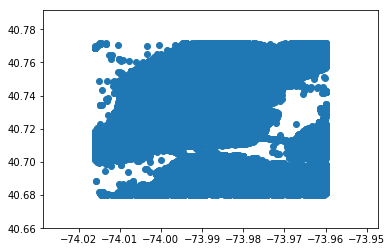

In [168]:
plt.scatter(df_uber['lon'], df_uber['lat'])
plt.show() #5.646 km (E-W) x 10.13 km (N-S)

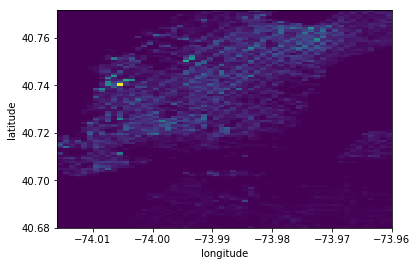

In [360]:
hist_uber = plt.hist2d(df_uber['lon'], df_uber['lat'], [56, 101])
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

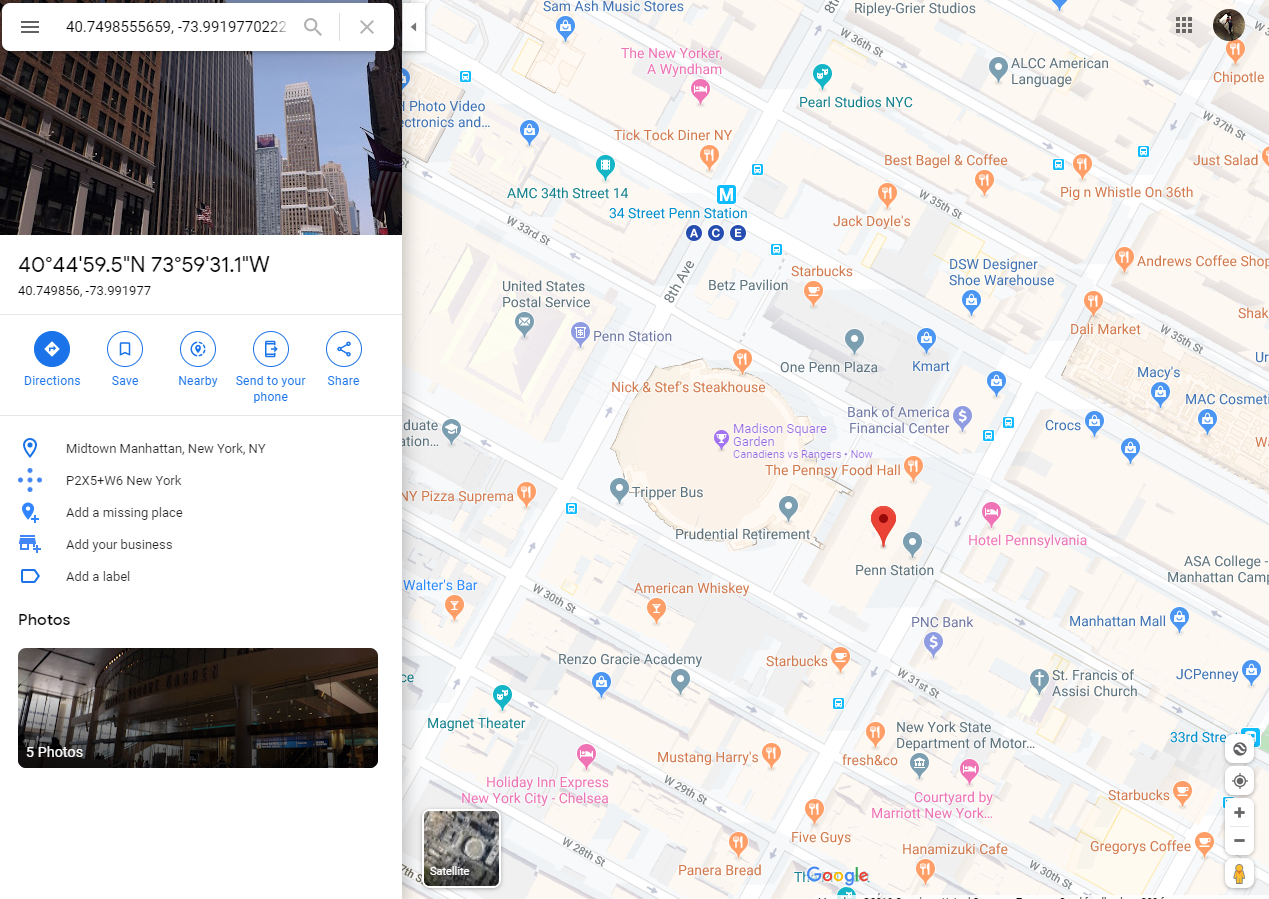

In [303]:
from IPython.display import Image
Image(filename='uber_max.png')

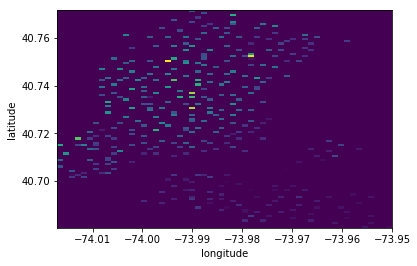

In [359]:
hist_citi = plt.hist2d(df_citi['lon'], df_citi['lat'], [56, 101])
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

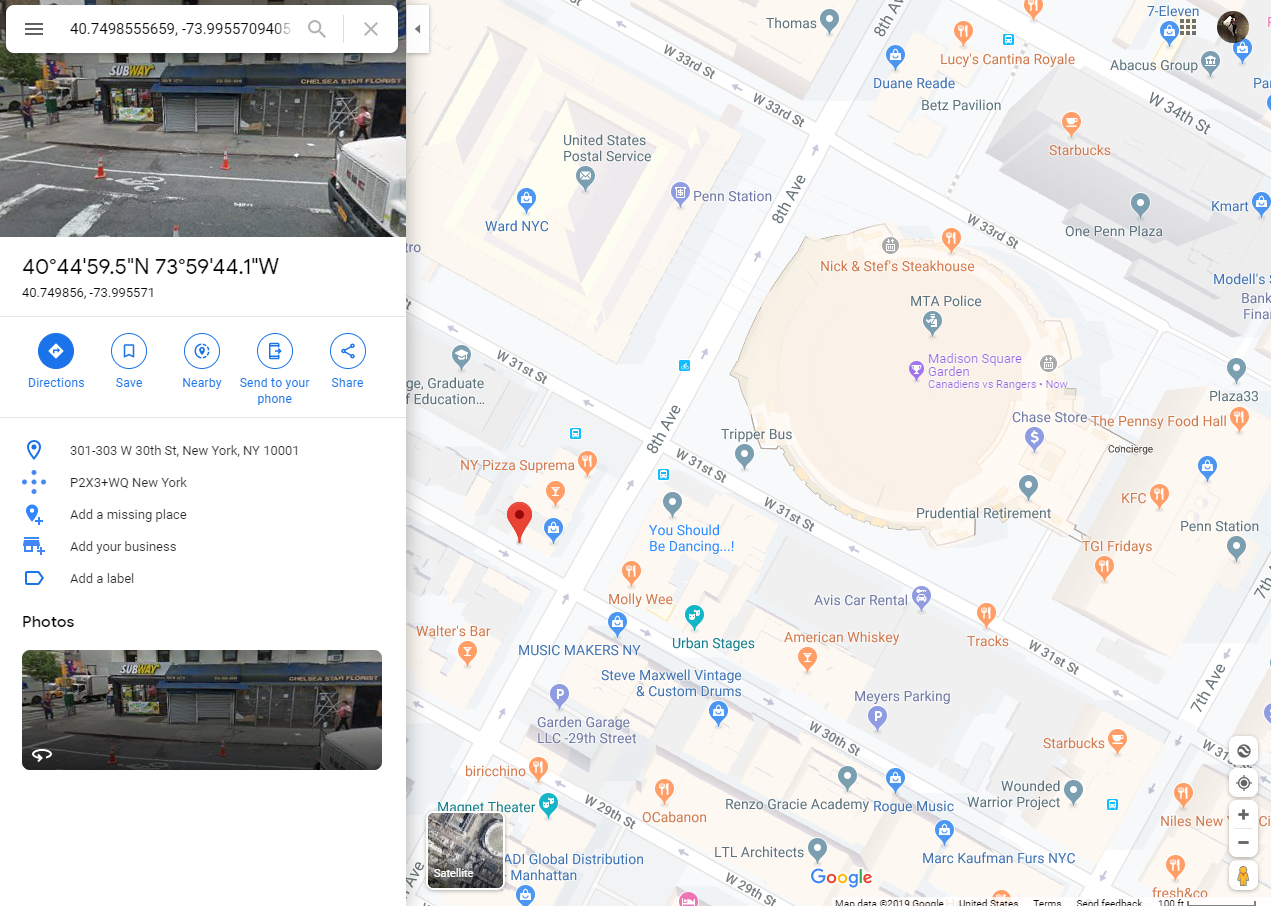

In [304]:
from IPython.display import Image
Image(filename='citi_max.png')

In [322]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

best fit line:
y = 7.74 + 0.27x


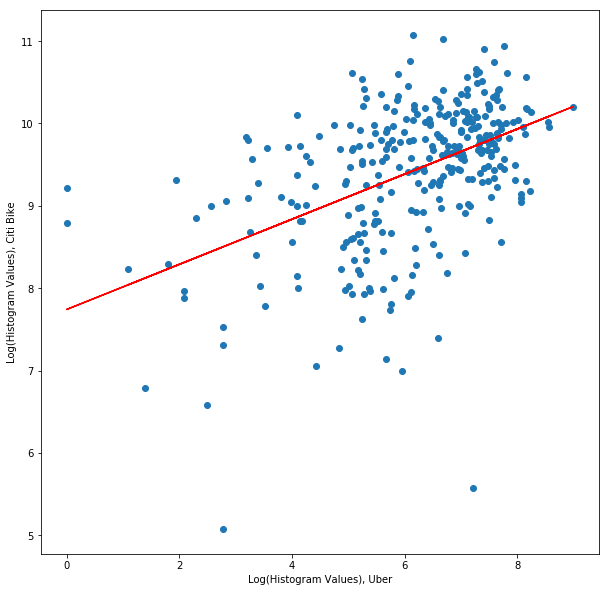

In [328]:
hist_citi_values = np.concatenate(hist_citi[0])
hist_citi_values = [int(i) for i in hist_citi_values]
hist_uber_values = np.concatenate(hist_uber[0])
hist_uber_values = [int(i) for i in hist_uber_values]
hist_lats = np.concatenate(hist_uber[0])
hist_uber_values = [int(i) for i in hist_uber_values]
hist_lons = np.concatenate(hist_uber[0])
hist_uber_values = [int(i) for i in hist_uber_values]

hist_lats = []
hist_lons = []
for i in range(0, len(hist_citi[0])):
    for j in range(0, len(hist_citi[0][0])):
        hist_lats.append(hist_citi[2][j])
        hist_lons.append(hist_citi[1][i])

hist_values = pd.DataFrame({'citi':hist_citi_values, 'uber':hist_uber_values, 'lat':hist_lats, 'lon':hist_lons})
hist_values = hist_values[hist_values.citi != 0]
hist_values = hist_values[hist_values.uber != 0]
hist_values['citi'] = [np.log(i) for i in hist_values['citi']]
hist_values['uber'] = [np.log(i) for i in hist_values['uber']]

fig = plt.figure(figsize=(10,10))
plt.scatter(hist_values['uber'], hist_values['citi'])

a, b = best_fit(hist_values['uber'], hist_values['citi'])
yfit = [a + b * xi for xi in hist_values['uber']]
plt.plot(hist_values['uber'], yfit, color='red')

plt.ylabel("Log(Histogram Values), Citi Bike")
plt.xlabel("Log(Histogram Values), Uber")
plt.show()

In [433]:
tree_df = hist_values
tree_df.head()

,citi,lat,lon,uber
28,9.682903,40.705620,-74.017134,5.068904
31,9.970959,40.708328,-74.017134,5.802118
38,10.562095,40.714648,-74.017134,8.160232
135,10.418166,40.711037,-74.015936,5.283204
225,9.279960,40.701106,-74.014739,3.401197


In [482]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split([hist_values['uber'], hist_values['lat'], hist_values['lon']], hist_values['citi'])
msk = np.random.rand(len(hist_values)) < 0.8
train = hist_values[msk]
test = hist_values[~msk]

clf = DecisionTreeRegressor()
clf.fit(train[['lat','lon','uber']], train['citi'])
clf.score(test[['lat','lon', 'uber']], test['citi'])

0.60378323413857315

In [513]:
clf3 = DecisionTreeRegressor()
clf3.fit(train[['lat','lon','uber']], train['citi'])
clf3.score(test[['lat','lon', 'uber']], test['citi'])

0.68382919122556585

In [569]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(train[['lat', 'lon', 'uber']], train['citi'])
clf.score(test[['lat','lon', 'uber']], test['citi'])

0.74496558538321711

In [637]:
rlf1 = RandomForestRegressor()
rlf1.fit(train[['lat', 'lon', 'uber']], train['citi'])
rlf1.score(test[['lat','lon', 'uber']], test['citi'])

0.78389235806559909

In [646]:
hist_values_new = pd.DataFrame({'citi':hist_citi_values, 'uber':hist_uber_values, 'lat':hist_lats, 'lon':hist_lons})
hist_values_new = hist_values_new[hist_values_new.citi == 0]
hist_values_new = hist_values_new[hist_values_new.uber != 0]
hist_values_new['citi'] = [np.log(i) for i in hist_values_new['citi']]
hist_values_new['uber'] = [np.log(i) for i in hist_values_new['uber']]

D:\Python\Anaconda\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log


In [656]:
predictions = rlf1.predict(hist_values_new[['lat', 'lon', 'uber']])
max(predictions)

10.71986751010898

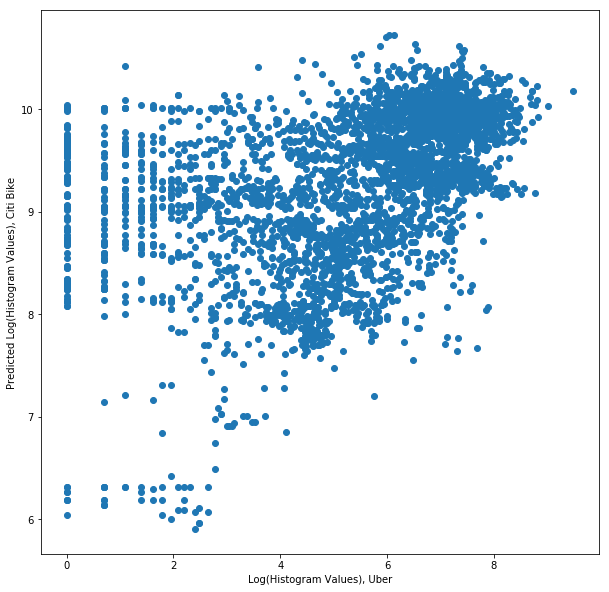

In [662]:
hist_values_new['predictions'] = predictions
fig = plt.figure(figsize=(10,10))
plt.scatter(hist_values_new['uber'], hist_values_new['predictions'])
plt.ylabel("Predicted Log(Histogram Values), Citi Bike")
plt.xlabel("Log(Histogram Values), Uber")
plt.show()

In [674]:
hist_uber
uber_lat_bin = []
uber_lon_bin = []
for lat in df_uber["lat"]:
    for i in range(len(hist_uber[2])):
        if (i == len(hist_uber[2])-1) or (hist_uber[2][i] <= lat and hist_uber[2][i+1] > lat):
            uber_lat_bin.append(hist_uber[2][i])
            break
            
for lon in df_uber["lon"]:
    for i in range(len(hist_uber[1])):
        if (i == len(hist_uber[1])-1) or (hist_uber[1][i] <= lon and hist_uber[1][i+1] > lon):
            uber_lon_bin.append(hist_uber[1][i])
            break

In [708]:
df_uber['lat_bin'] = uber_lat_bin
df_uber['lon_bin'] = uber_lon_bin
df_uber.head()

,month,day,hour,min,lat,lon,lat_bin,lon_bin
2,4.0,1.0,0.0,21.0,40.7316,-73.9873,40.730788,-73.988
3,4.0,1.0,0.0,28.0,40.7588,-73.9776,40.757996,-73.978
4,4.0,1.0,0.0,33.0,40.7594,-73.9722,40.758903,-73.973
6,4.0,1.0,0.0,39.0,40.7223,-73.9887,40.721719,-73.989
7,4.0,1.0,0.0,45.0,40.7620,-73.9790,40.761624,-73.979


In [723]:
uber_hist_vals = []
for i in range(len(uber_lat_bin)):
    try:
        y = np.where(hist_uber[2] == uber_lat_bin[i])[0][0]
        x = np.where(hist_uber[1] == uber_lon_bin[i])[0][0]
        uber_hist_vals.append(hist_uber[0][x][y])
    except:
        uber_hist_vals.append(-1)
    
df_uber["hist_val"] = np.log(uber_hist_vals)
df_uber.head()

,month,day,hour,min,lat,lon,lat_bin,lon_bin,hist_val
2,4.0,1.0,0.0,21.0,40.7316,-73.9873,40.730788,-73.988,634.0
3,4.0,1.0,0.0,28.0,40.7588,-73.9776,40.757996,-73.978,3479.0
4,4.0,1.0,0.0,33.0,40.7594,-73.9722,40.758903,-73.973,6445.0
6,4.0,1.0,0.0,39.0,40.7223,-73.9887,40.721719,-73.989,2561.0
7,4.0,1.0,0.0,45.0,40.7620,-73.9790,40.761624,-73.979,4496.0


In [728]:
hist_citi
citi_lat_bin = []
citi_lon_bin = []
for lat in df_citi["lat"]:
    for i in range(len(hist_citi[2])):
        if (i == len(hist_citi[2])-1) or (hist_citi[2][i] <= lat and hist_citi[2][i+1] > lat):
            citi_lat_bin.append(hist_citi[2][i])
            break
            
for lon in df_citi["lon"]:
    for i in range(len(hist_citi[1])):
        if (i == len(hist_citi[1])-1) or (hist_citi[1][i] <= lon and hist_citi[1][i+1] > lon):
            citi_lon_bin.append(hist_citi[1][i])
            break
            
citi_hist_vals = []
for i in range(len(citi_lat_bin)):
    try:
        y = np.where(hist_citi[2] == citi_lat_bin[i])[0][0]
        x = np.where(hist_citi[1] == citi_lon_bin[i])[0][0]
        citi_hist_vals.append(hist_citi[0][x][y])
    except:
        citi_hist_vals.append(-1)

df_citi['lat_bin'] = citi_lat_bin
df_citi['lon_bin'] = citi_lon_bin
df_citi["hist_val"] = np.log(citi_hist_vals)
df_citi.head()

,month,day,hour,min,lat,lon,lat_bin,lon_bin,hist_val
0,4.0,1.0,0.0,0.0,40.711174,-74.000165,40.711037,-74.000363,6540.0
1,4.0,1.0,0.0,0.0,40.718502,-73.983299,40.718259,-73.983591,10475.0
2,4.0,1.0,0.0,0.0,40.730287,-73.990765,40.729995,-73.990779,56130.0
3,4.0,1.0,0.0,0.0,40.715348,-73.960241,40.714648,-73.960830,12650.0
4,4.0,1.0,0.0,1.0,40.746745,-74.007756,40.746244,-74.008749,28351.0


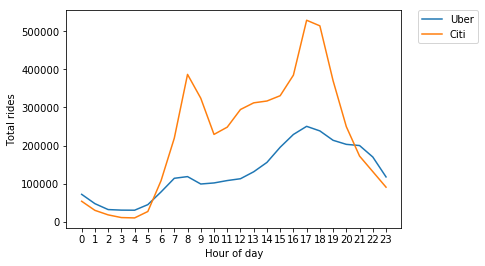

In [749]:
# x = []
# y1 = []
# y2 = []
# for hour in range(0, 24):
#     x.append(hour)
#     y1.append(df_uber[(df_uber["hour"] < hour+1) & (df_uber["hour"] >= hour)].shape[0])
#     y2.append(df_citi[(df_citi["hour"] < hour+1) & (df_citi["hour"] >= hour)].shape[0])
    
plt.plot(x, y1, label="Uber")
plt.plot(x, y2, label="Citi")
plt.xticks(x)
plt.xlabel("Hour of day")
plt.ylabel("Total rides")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [737]:
#Splitting data by time of day
citi_t1 = df_citi[(df_citi["hour"] < 4) & (df_citi["hour"] >= 0)]
citi_t2 = df_citi[(df_citi["hour"] < 8) & (df_citi["hour"] >= 4)] 
citi_t3 = df_citi[(df_citi["hour"] < 12) & (df_citi["hour"] >= 8)] 
citi_t4 = df_citi[(df_citi["hour"] < 16) & (df_citi["hour"] >= 12)] 
citi_t5 = df_citi[(df_citi["hour"] < 20) & (df_citi["hour"] >= 16)] 
citi_t6 = df_citi[(df_citi["hour"] < 24) & (df_citi["hour"] >= 20)]
print(citi_t1.shape)
print(citi_t2.shape)
print(citi_t3.shape)
print(citi_t4.shape)
print(citi_t5.shape)
print(citi_t6.shape)

(112319, 9)
(363997, 9)
(1188138, 9)
(1254091, 9)
(1797628, 9)
(643822, 9)


In [739]:
#Splitting data by time of day
uber_t1 = df_uber[(df_uber["hour"] < 4) & (df_uber["hour"] >= 0)]
uber_t2 = df_uber[(df_uber["hour"] < 8) & (df_uber["hour"] >= 4)] 
uber_t3 = df_uber[(df_uber["hour"] < 12) & (df_uber["hour"] >= 8)] 
uber_t4 = df_uber[(df_uber["hour"] < 16) & (df_uber["hour"] >= 12)] 
uber_t5 = df_uber[(df_uber["hour"] < 20) & (df_uber["hour"] >= 16)] 
uber_t6 = df_uber[(df_uber["hour"] < 24) & (df_uber["hour"] >= 20)]
print(uber_t1.shape)
print(uber_t2.shape)
print(uber_t3.shape)
print(uber_t4.shape)
print(uber_t5.shape)
print(uber_t6.shape)

(181572, 9)
(267203, 9)
(427140, 9)
(594962, 9)
(931369, 9)
(690436, 9)


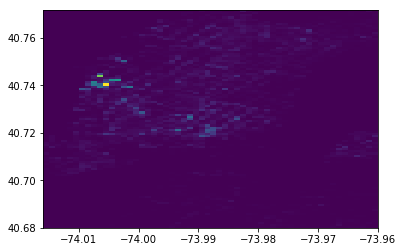

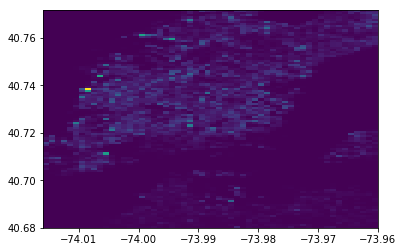

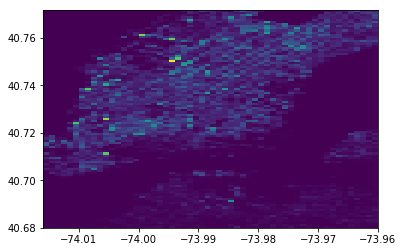

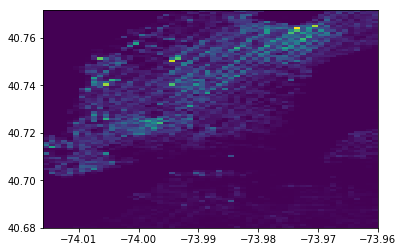

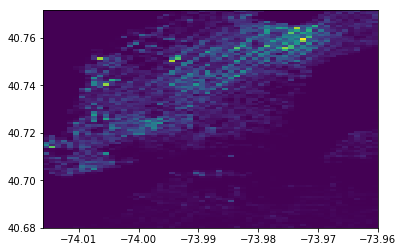

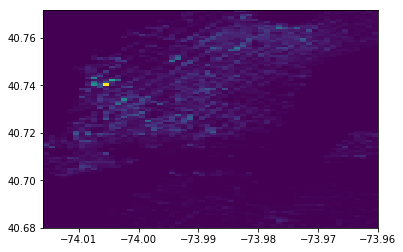

In [754]:
ubertimesteps = [uber_t1, uber_t2, uber_t3, uber_t4, uber_t5, uber_t6]
for timestep in ubertimesteps:
    histo = plt.hist2d(timestep['lon'], timestep['lat'], [56, 101])
    plt.show()

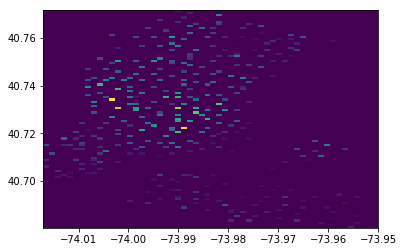

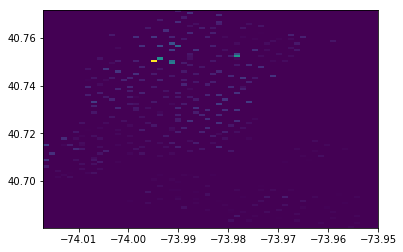

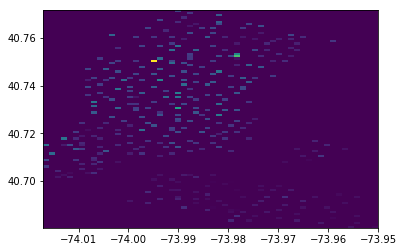

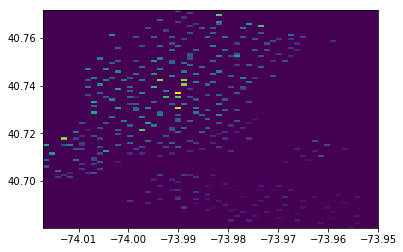

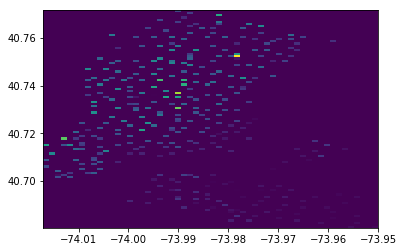

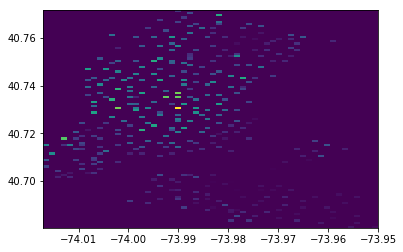

In [755]:
cititimesteps = [citi_t1, citi_t2, citi_t3, citi_t4, citi_t5, citi_t6]
for timestep in cititimesteps:
    histo = plt.hist2d(timestep['lon'], timestep['lat'], [56, 101])
    plt.show()

best fit line:
y = 4.57 + 0.27x


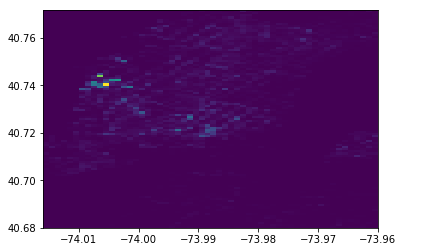

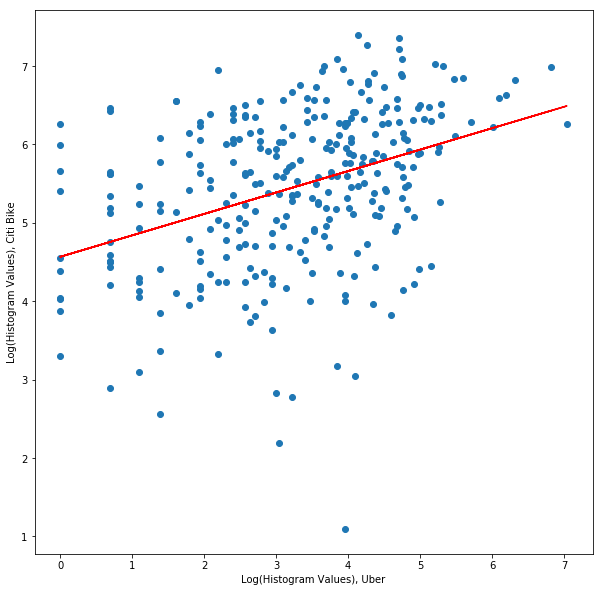

best fit line:
y = 5.76 + 0.23x


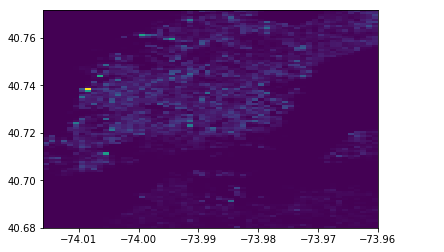

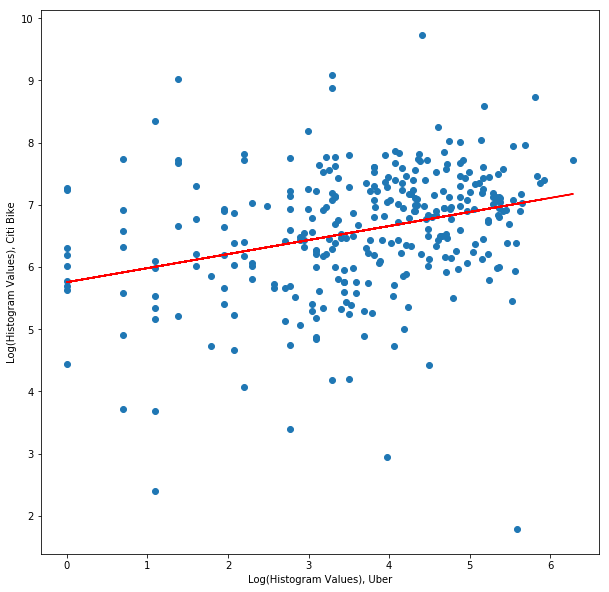

best fit line:
y = 6.79 + 0.27x


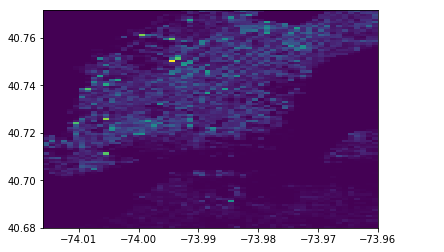

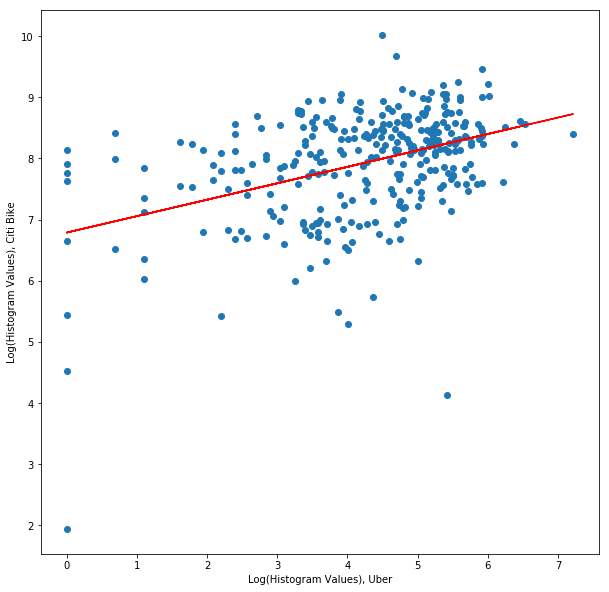

best fit line:
y = 6.48 + 0.33x


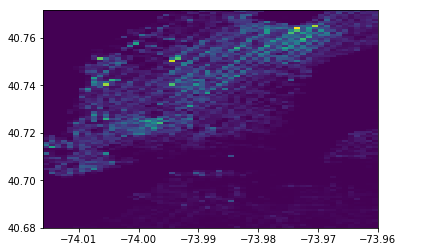

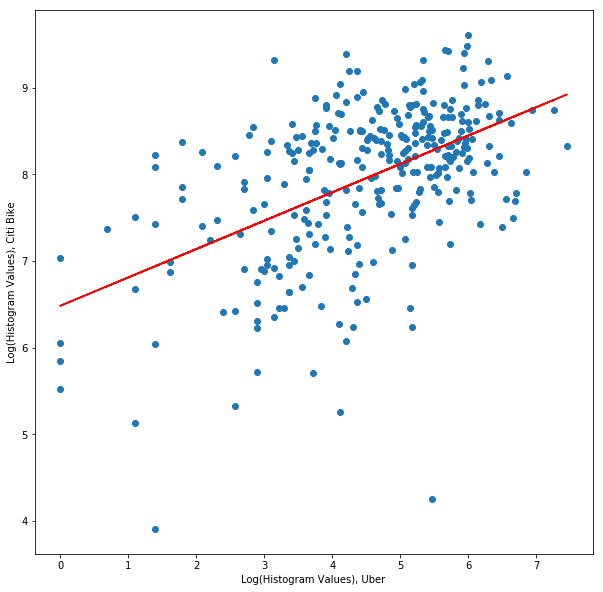

best fit line:
y = 6.73 + 0.32x


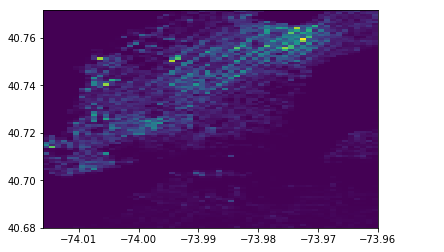

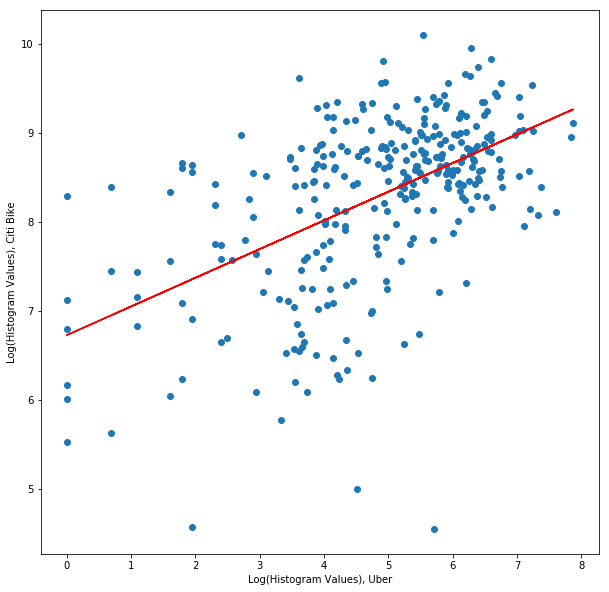

best fit line:
y = 6.08 + 0.25x


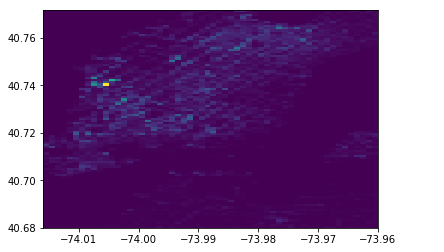

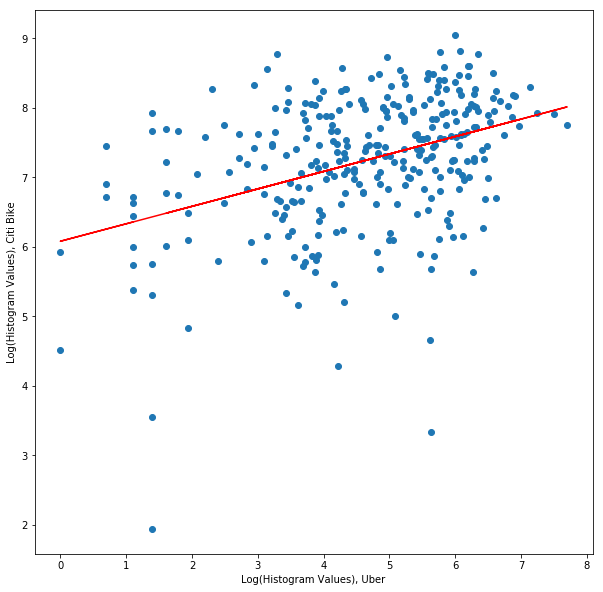

In [756]:
for timestep in range(6):
    hist_citi = plt.hist2d(cititimesteps[timestep]['lon'], cititimesteps[timestep]['lat'], [56, 101])
    hist_uber = plt.hist2d(ubertimesteps[timestep]['lon'], ubertimesteps[timestep]['lat'], [56, 101])
    
    hist_citi_values = np.concatenate(hist_citi[0])
    hist_citi_values = [int(i) for i in hist_citi_values]
    hist_uber_values = np.concatenate(hist_uber[0])
    hist_uber_values = [int(i) for i in hist_uber_values]
    hist_lats = np.concatenate(hist_uber[0])
    hist_uber_values = [int(i) for i in hist_uber_values]
    hist_lons = np.concatenate(hist_uber[0])
    hist_uber_values = [int(i) for i in hist_uber_values]

    hist_lats = []
    hist_lons = []
    for i in range(0, len(hist_citi[0])):
        for j in range(0, len(hist_citi[0][0])):
            hist_lats.append(hist_citi[2][j])
            hist_lons.append(hist_citi[1][i])

    hist_values = pd.DataFrame({'citi':hist_citi_values, 'uber':hist_uber_values, 'lat':hist_lats, 'lon':hist_lons})
    hist_values = hist_values[hist_values.citi != 0]
    hist_values = hist_values[hist_values.uber != 0]
    hist_values['citi'] = [np.log(i) for i in hist_values['citi']]
    hist_values['uber'] = [np.log(i) for i in hist_values['uber']]

    fig = plt.figure(figsize=(10,10))
    plt.scatter(hist_values['uber'], hist_values['citi'])

    a, b = best_fit(hist_values['uber'], hist_values['citi'])
    yfit = [a + b * xi for xi in hist_values['uber']]
    plt.plot(hist_values['uber'], yfit, color='red')

    plt.ylabel("Log(Histogram Values), Citi Bike")
    plt.xlabel("Log(Histogram Values), Uber")
    plt.show()

In [797]:
def timestepDf(timestep, arr_citi, arr_uber):
    hist_citi = plt.hist2d(arr_citi[timestep]['lon'], arr_citi[timestep]['lat'], [56, 101])
    hist_uber = plt.hist2d(arr_uber[timestep]['lon'], arr_uber[timestep]['lat'], [56, 101])
    
    hist_citi_values = np.concatenate(hist_citi[0])
    hist_citi_values = [int(i) for i in hist_citi_values]
    hist_uber_values = np.concatenate(hist_uber[0])
    hist_uber_values = [int(i) for i in hist_uber_values]
    hist_lats = np.concatenate(hist_uber[0])
    hist_uber_values = [int(i) for i in hist_uber_values]
    hist_lons = np.concatenate(hist_uber[0])
    hist_uber_values = [int(i) for i in hist_uber_values]

    hist_lats = []
    hist_lons = []
    for i in range(0, len(hist_citi[0])):
        for j in range(0, len(hist_citi[0][0])):
            hist_lats.append(hist_citi[2][j])
            hist_lons.append(hist_citi[1][i])

    hist_values = pd.DataFrame({'citi':hist_citi_values, 'uber':hist_uber_values, 'lat':hist_lats, 'lon':hist_lons})
    hist_values = hist_values[hist_values.citi != 0]
    hist_values = hist_values[hist_values.uber != 0]
    hist_values['citi'] = [np.log(i) for i in hist_values['citi']]
    hist_values['uber'] = [np.log(i) for i in hist_values['uber']]
    return hist_values

In [796]:
# t1 = timestepDf(0)

best_dtr = dtr
best_rfr = rfr
best_dtr_score = 0
best_rfr_score = 0
for x in range(100000):
    msk = np.random.rand(len(t1)) < 0.8
    train = t1[msk]
    test = t1[~msk]

    dtr = DecisionTreeRegressor()
    dtr.fit(train[['lat','lon','uber']], train['citi'])
    if dtr.score(test[['lat','lon', 'uber']], test['citi']) > best_dtr_score:
        best_dtr = dtr
        best_dtr_score = dtr.score(test[['lat','lon', 'uber']], test['citi'])
        print("best dtr:" + str(best_dtr_score))

    rfr = RandomForestRegressor()
    rfr.fit(train[['lat', 'lon', 'uber']], train['citi'])
    if rfr.score(test[['lat','lon', 'uber']], test['citi']) > best_rfr_score:
        best_rfr = rfr
        best_rfr_score = rfr.score(test[['lat','lon', 'uber']], test['citi'])
        print("best rfr:" + str(best_rfr_score))
        
print("done")

best dtr:0.0323438370742
best rfr:0.431007132712
best dtr:0.40611115152
best rfr:0.513771395023
best rfr:0.632269466543
best dtr:0.469687790514
best rfr:0.676586545768
best dtr:0.488361479201
best dtr:0.531065328109
best dtr:0.550505446604
best dtr:0.560287366216
best rfr:0.689653537051
best rfr:0.722579179175
best dtr:0.606156751101
best dtr:0.625972927116
best rfr:0.725157709475
best dtr:0.661981530392
best rfr:0.756409774579


KeyboardInterrupt: 

In [799]:
cititimesteps2 = []
ubertimesteps2 = []
for x in range(4):
    length = 24/4
    cititimesteps2.append(df_citi[(df_citi["hour"] < (x+1)*length) & (df_citi["hour"] >= x*length)])
    ubertimesteps2.append(df_uber[(df_uber["hour"] < (x+1)*length) & (df_uber["hour"] >= x*length)])
    
t1_2 = timestepDf(0, cititimesteps2, ubertimesteps2)

best_dtr = dtr
best_rfr = rfr
best_dtr_score = 0
best_rfr_score = 0
for x in range(1000):
    msk = np.random.rand(len(t1_2)) < 0.8
    train = t1_2[msk]
    test = t1_2[~msk]

    dtr = DecisionTreeRegressor()
    dtr.fit(train[['lat','lon','uber']], train['citi'])
    if dtr.score(test[['lat','lon', 'uber']], test['citi']) > best_dtr_score:
        best_dtr = dtr
        best_dtr_score = dtr.score(test[['lat','lon', 'uber']], test['citi'])
        print("best dtr:" + str(best_dtr_score))

    rfr = RandomForestRegressor()
    rfr.fit(train[['lat', 'lon', 'uber']], train['citi'])
    if rfr.score(test[['lat','lon', 'uber']], test['citi']) > best_rfr_score:
        best_rfr = rfr
        best_rfr_score = rfr.score(test[['lat','lon', 'uber']], test['citi'])
        print("best rfr:" + str(best_rfr_score))
        
print("done")

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq\backend\cython\message.c:4294)
    PyErr_CheckSignals()


best dtr:0.178928380921
best rfr:0.397085022512
best rfr:0.48448459155
best rfr:0.582373551505
best rfr:0.615736062188
best dtr:0.34181752349
best dtr:0.349693451229
best dtr:0.362234973362
best dtr:0.3990476552
best dtr:0.435574893023
best dtr:0.526317315038
best rfr:0.616587850793
best rfr:0.630721336224
best rfr:0.636528974004
best rfr:0.637616284909
best rfr:0.707936740357
best dtr:0.60589102361
done


KeyboardInterrupt


In [ ]:
hist_citi = plt.hist2d(arr_citi[timestep]['lon'], arr_citi[timestep]['lat'], [56, 101])